In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,NaN,3.49,NaN,NaN,NaN,NaN,NaN,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	0
float64		column 3	0
float64		column 4	22
int64		column 5	0
float64		column 6	21
float64		column 7	15
float64		column 8	14
float64		column 9	29
float64		column 10	14
float64		column 11	29
float64		column 12	36
float64		column 13	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,156.000000,178.000000,178.000000,156.000000,178.000000,157.000000,163.000000,164.000000,149.000000,164.000000,149.000000,142.000000,164.000000
mean,12.991667,2.336348,2.366517,19.500641,99.741573,2.270828,1.989264,0.363476,1.572752,5.141159,0.928497,2.542113,745.829268
std,0.787586,1.117146,0.274344,3.260744,14.282484,0.632186,0.972417,0.125862,0.593091,2.330843,0.223287,0.726550,310.906504
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.602500,2.210000,17.475000,88.000000,1.700000,1.095000,0.270000,1.220000,3.292500,0.750000,1.820000,501.500000
50%,13.040000,1.865000,2.360000,19.500000,98.000000,2.230000,2.110000,0.340000,1.480000,4.800000,0.950000,2.760000,675.000000
75%,13.632500,3.082500,2.557500,21.500000,107.000000,2.800000,2.785000,0.442500,1.900000,6.225000,1.090000,3.170000,985.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,3.750000,0.660000,3.580000,13.000000,1.420000,3.920000,1680.000000


<AxesSubplot:>

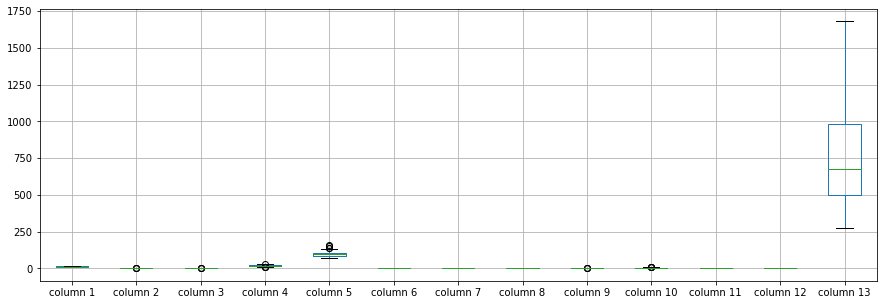

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.991667
column 2       2.336348
column 3       2.366517
column 4      19.500641
column 5      99.741573
column 6       2.270828
column 7       1.989264
column 8       0.363476
column 9       1.572752
column 10      5.141159
column 11      0.928497
column 12      2.542113
column 13    745.829268
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.130268,0.306211,-0.224548,0.280610,0.232961,0.245189,-0.036175,0.108384,0.537351,-0.036888,0.027860,0.598940
column 2,0.130268,1.000000,0.164045,0.288759,-0.054575,-0.354712,-0.448805,0.301643,-0.231882,0.254877,-0.567703,-0.391298,-0.180483
column 3,0.306211,0.164045,1.000000,0.433333,0.286587,0.109078,0.065601,0.193282,0.059656,0.247219,-0.077001,-0.017278,0.233477
column 4,-0.224548,0.288759,0.433333,1.000000,-0.091446,-0.326816,-0.412175,0.316279,-0.187611,0.107219,-0.329471,-0.295886,-0.382515
column 5,0.280610,-0.054575,0.286587,-0.091446,1.000000,0.201268,0.165567,-0.267535,0.203660,0.187233,0.047322,0.035216,0.381932
column 6,0.232961,-0.354712,0.109078,-0.326816,0.201268,1.000000,0.868670,-0.466641,0.629969,-0.094756,0.501661,0.711362,0.480581
column 7,0.245189,-0.448805,0.065601,-0.412175,0.165567,0.868670,1.000000,-0.581880,0.672696,-0.268433,0.625943,0.803706,0.488192
column 8,-0.036175,0.301643,0.193282,0.316279,-0.267535,-0.466641,-0.581880,1.000000,-0.334027,0.167803,-0.315375,-0.505753,-0.300733
column 9,0.108384,-0.231882,0.059656,-0.187611,0.203660,0.629969,0.672696,-0.334027,1.000000,-0.044517,0.324899,0.521899,0.325434
column 10,0.537351,0.254877,0.247219,0.107219,0.187233,-0.094756,-0.268433,0.167803,-0.044517,1.000000,-0.527916,-0.485486,0.255565


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+77,13+77+77,13+77+77,13+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77,13+77+77+77,13+77+77,13+77,13], vae_layer = False, seed = 770)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 893.1986361416904
Epoch: 1 , loss: 889.8585981889205
Epoch: 2 , loss: 884.8557683771306
Epoch: 3 , loss: 892.1355035955256
Epoch: 4 , loss: 889.3503251509233
Epoch: 5 , loss: 885.3032892400569
Epoch: 6 , loss: 889.1380837180398
Epoch: 7 , loss: 887.1406360973011
Epoch: 8 , loss: 889.8919178355824
Epoch: 9 , loss: 894.7225952148438
Epoch: 10 , loss: 891.352294921875
Epoch: 11 , loss: 888.585038618608
Epoch: 12 , loss: 888.8403986150569
Epoch: 13 , loss: 888.1207497336648
Epoch: 14 , loss: 890.3235973011364
Epoch: 15 , loss: 884.6980035955256
Epoch: 16 , loss: 885.0611738725142
Epoch: 17 , loss: 877.2162808504971
Epoch: 18 , loss: 875.9329612038352
Epoch: 19 , loss: 874.5793235085227
Epoch: 20 , loss: 874.8205732865767
Epoch: 21 , loss: 874.9409068714489
Epoch: 22 , loss: 873.2906549627131
Epoch: 23 , loss: 866.547812721946
Epoch: 24 , loss: 867.6925714666194
Epoch: 25 , loss: 859.0548706054688
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0,-3.747059,0.0,-0.169934,-2.087391,-7.696293,-0.77217,-3.352954,0.0
4,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
174,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
175,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
176,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3142.735447154099, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.28837520139559175

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.800000,3.06,0.280000,2.290000,5.640000,1.04000,3.920000,1065.0
1,13.20,1.78,2.14,11.2,100,2.650000,2.76,0.260000,1.280000,4.380000,1.05000,3.400000,1050.0
2,13.16,2.36,2.67,18.6,101,2.800000,3.24,0.300000,2.810000,5.680000,1.03000,3.170000,1185.0
3,14.37,1.95,2.50,16.8,113,0.102941,3.49,0.070066,0.092609,0.103707,0.08783,0.097046,1480.0
4,13.24,2.59,2.87,21.0,118,2.800000,2.69,0.390000,1.820000,4.320000,1.04000,2.930000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.680000,0.61,0.520000,1.060000,7.700000,0.64000,1.740000,740.0
174,13.40,3.91,2.48,23.0,102,1.800000,0.75,0.430000,1.410000,7.300000,0.70000,1.560000,750.0
175,13.27,4.28,2.26,20.0,120,1.590000,0.69,0.430000,1.350000,10.200000,0.59000,1.560000,835.0
176,13.17,2.59,2.37,20.0,120,1.650000,0.68,0.530000,1.460000,9.300000,0.60000,1.620000,840.0


In [20]:
imputations[-1].to_excel("Wine_AN_10(imp).xlsx", index=False, header=False)